# London Housing Case Study
creator: Sergio P. Cartagena     
cohort: SB May 2024

### Question to solve for case study:
Which borough of London has seen the greatest average increase in housing prices over
the (approximately) two decades covered by the dataset?

### 1. Sourcing and Loading 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  

# [ref 1]
# specifying engine to support 'xls' file type.
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', engine='openpyxl', index_col= None)

### 2. Cleaning, transforming, and visualizing

#### 2.1. Exploring your data 

In [3]:
# explore initial data loading
df = properties
df.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [4]:
# verify rows / columns qty
df.shape

(352, 49)

In [5]:
# verify columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            351 non-null    datetime64[ns]
 1   City of London        352 non-null    object        
 2   Barking & Dagenham    352 non-null    object        
 3   Barnet                352 non-null    object        
 4   Bexley                352 non-null    object        
 5   Brent                 352 non-null    object        
 6   Bromley               352 non-null    object        
 7   Camden                352 non-null    object        
 8   Croydon               352 non-null    object        
 9   Ealing                352 non-null    object        
 10  Enfield               352 non-null    object        
 11  Greenwich             352 non-null    object        
 12  Hackney               352 non-null    object        
 13  Hammersmith & Fulham

#### 2.2. Cleaning the data

first row containes codes of some sort that likely represent geographical identifiers corresponding to the borroughs. This suggests that these should potentially be column headers. Current structure has dates and values as rows and geographical locations as columns. Transposing the dataframe would make dates columns and locations rows.

In [6]:
# review first row
df.iloc[0]

Unnamed: 0                    NaT
City of London          E09000001
Barking & Dagenham      E09000002
Barnet                  E09000003
Bexley                  E09000004
Brent                   E09000005
Bromley                 E09000006
Camden                  E09000007
Croydon                 E09000008
Ealing                  E09000009
Enfield                 E09000010
Greenwich               E09000011
Hackney                 E09000012
Hammersmith & Fulham    E09000013
Haringey                E09000014
Harrow                  E09000015
Havering                E09000016
Hillingdon              E09000017
Hounslow                E09000018
Islington               E09000019
Kensington & Chelsea    E09000020
Kingston upon Thames    E09000021
Lambeth                 E09000022
Lewisham                E09000023
Merton                  E09000024
Newham                  E09000025
Redbridge               E09000026
Richmond upon Thames    E09000027
Southwark               E09000028
Sutton        

In [7]:
# transpose dataframe
df_transposed = df.T
df_transposed.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [8]:
# verify result
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037


In [9]:
# verify rows / columns
df_transposed.shape

(49, 352)

In [10]:
# reset index
df_reset = df_transposed.reset_index()

In [11]:
# verify df 
df_reset.head()

,index,0,1,2,3,4,5,6,7,8,...,342,343,344,345,346,347,348,349,350,351
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037


reset columns to be the first row (index 0) of the dataframe. Allowing the dates to be column headers.

we drop the unnessary row that is a duplicate of the column headers. 

In [12]:
df_reset.columns = df_reset.iloc[0]
df_reset.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037


In [13]:
# remove first row with redundant data
# verify result

df_cleaned = df_reset.drop(0).reset_index(drop=True)
df_cleaned.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
0,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
3,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037
4,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,516817,511865,528739,528787,528411,514028,510416,527380,530682,512292


In [14]:
# verify rows, columns 
df_cleaned.shape

(48, 353)

#### 2.3. Cleaning the data (part 2)

rename a couple of obvious columns

In [15]:
# grab the 1st two columns
# rename appropriately

col_0 = df_cleaned.columns[0]
col_1 = df_cleaned.columns[1]
df_cleaned.rename(columns={col_0:'borough',col_1:'ID'},inplace=True)
df_cleaned.head()

,borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
0,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
3,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037
4,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,516817,511865,528739,528787,528411,514028,510416,527380,530682,512292


#### 2.4. Transforming the data

In [16]:
# [3] melt dataframe
# specify columns to retain and variable to generate
df_melted = pd.melt(df_cleaned, id_vars = ["borough","ID"],var_name ="date",value_name="price")

In [17]:
# view the resulting 'melted' df
df_melted.head()

,borough,ID,date,price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [18]:
# check datatypes
df_melted.dtypes

borough            object
ID                 object
date       datetime64[ns]
price              object
dtype: object

In [19]:
# convert to numeric for price column
df_melted['price'] = pd.to_numeric(df_melted['price'], errors ='coerce')

In [20]:
# verify price column successfully converted to numeric

print(df_melted.dtypes)
df_melted.head()

borough            object
ID                 object
date       datetime64[ns]
price             float64
dtype: object


,borough,ID,date,price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [21]:
# [5] pandas attribute to month
# generate column with month
df_melted['month'] = df_melted['date'].dt.month

In [22]:
# [5] pandas attribute to year
# generate column with year
df_melted['year'] = df_melted['date'].dt.year

In [23]:
# check out dataframe with month/ year columns
print(df_melted.dtypes)
df_melted.head()

borough            object
ID                 object
date       datetime64[ns]
price             float64
month               int64
year                int64
dtype: object


,borough,ID,date,price,month,year
0,City of London,E09000001,1995-01-01,91448.98487,1,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1,1995
4,Brent,E09000005,1995-01-01,71306.56698,1,1995


#### 2.5. Cleaning the data (part 3)

In [24]:
# check for null quantities 
df_melted.isnull().sum()

borough       0
ID         1053
date          0
price      1053
month         0
year          0
dtype: int64

In [25]:
# check for null quantities 
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   borough  16848 non-null  object        
 1   ID       15795 non-null  object        
 2   date     16848 non-null  datetime64[ns]
 3   price    15795 non-null  float64       
 4   month    16848 non-null  int64         
 5   year     16848 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 789.9+ KB


In [26]:
# drop rows with nulls present
df_refined = df_melted.dropna()

In [27]:
# verify null qty / equal entries
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15795 entries, 0 to 16847
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   borough  15795 non-null  object        
 1   ID       15795 non-null  object        
 2   date     15795 non-null  datetime64[ns]
 3   price    15795 non-null  float64       
 4   month    15795 non-null  int64         
 5   year     15795 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 863.8+ KB


In [28]:
# verify qty of unique boroughs 
df_refined['borough'].nunique()

45

we have 45 detected unique boroughs, but we should only have 32. So we'll need to reference a list of boroughs [2] to then cross reference what rows are not part of the study. 

In [29]:
# referenced from [2]
# this is our list to cross reference for true boroughs
# verify list count = 32

borough_list =[
    'Barking & Dagenham',
    'Barnet',
    'Bexley',
    'Brent',
    'Bromley',
    'Camden',
    'Croydon',
    'Ealing',
    'Enfield',
    'Greenwich',
    'Hackney',
    'Hammersmith & Fulham',
    'Haringey',
    'Harrow',
    'Havering',
    'Hillingdon',
    'Hounslow',
    'Islington',
    'Kensington & Chelsea',
    'Kingston upon Thames',
    'Lambeth',
    'Lewisham',
    'Merton',
    'Newham',
    'Redbridge',
    'Richmond upon Thames',
    'Southwark',
    'Sutton',
    'Tower Hamlets',
    'Waltham Forest',
    'Wandsworth',
    'Westminster'
]

len(borough_list)

32

In [30]:
# identifying the boroughs not part of the unique 32 
# through process of elimination

unaccounted_boroughs = [borough for borough in df_refined['borough'].unique() if borough not in borough_list]
unaccounted_boroughs

['City of London',
 'Inner London',
 'Outer London',
 'NORTH EAST',
 'NORTH WEST',
 'YORKS & THE HUMBER',
 'EAST MIDLANDS',
 'WEST MIDLANDS',
 'EAST OF ENGLAND',
 'LONDON',
 'SOUTH EAST',
 'SOUTH WEST',
 'England']

In [31]:
# now let's identify the indices of the dataframe to remove these rows
# corresponding to the irrelevant boroughs.
# verify result

mask = df_refined['borough'].isin(unaccounted_boroughs)
indices = df_refined[mask].index
indices

Int64Index([    0,    34,    35,    37,    38,    39,    40,    41,    42,
               43,
            ...
            16837, 16838, 16839, 16840, 16841, 16842, 16843, 16844, 16845,
            16847],
           dtype='int64', length=4563)

In [32]:
# create refined2 dataframe 
# from dropping indices with irrelevant boroughs
# verify result

df_refined2 = df_refined.drop(indices)
df_refined2.head()

,borough,ID,date,price,month,year
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1,1995
4,Brent,E09000005,1995-01-01,71306.56698,1,1995
5,Bromley,E09000006,1995-01-01,81671.47692,1,1995


In [33]:
# verify all 32 boroughs are in the refined2 dataframe

all_boroughs = df_refined2['borough'].unique()
print(len(all_boroughs))
all_boroughs

32


array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [34]:
# verify qty entries and dtypes 
df_refined2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11232 entries, 1 to 16832
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   borough  11232 non-null  object        
 1   ID       11232 non-null  object        
 2   date     11232 non-null  datetime64[ns]
 3   price    11232 non-null  float64       
 4   month    11232 non-null  int64         
 5   year     11232 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 614.2+ KB


#### 2.6. Visualizing the data

In [35]:
# view all 32 boroughs from the data
all_boroughs

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [36]:
# view all years from the data
all_years = df_refined2['year'].unique()
all_years

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

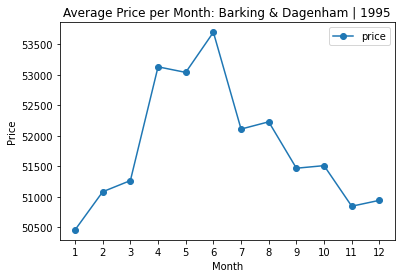

In [37]:
# select year and borough
borough = all_boroughs[0]
year = all_years[0]

# set up dataframe
mask = (df_refined2['borough'] == borough) & (df_refined2['year'] == year) 
df = df_refined2[mask]

# plotting the line plot
df.plot(x='month', y='price', kind='line', marker='o')
plt.title(f'Average Price per Month: {borough} | {year}')
plt.xlabel('Month')
plt.ylabel('Price')

plt.xticks(ticks=range(1,13), labels=range(1, 13));


#### 3. Modeling

In [38]:
# view all boroughs 
all_boroughs

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [39]:
# function to create 1998/2018 ratios
# input is a string of the desired borough

def create_price_ratio(borough):
    # set up dataframe
    mask = df_refined2['borough'] == borough
    df = df_refined2[mask]
    
    yr1 = 1998
    yr2 = 2018
    
    mask_yr1 = df['year'] == yr1
    avg_price_1998 = df[mask_yr1]['price'].mean()
    
    mask_yr2 = df['year'] == yr2
    avg_price_2018 = df[mask_yr2]['price'].mean()
    
    ratio = avg_price_1998 / avg_price_2018
    
    return ratio

In [40]:
# collect all ratios per borough in a dictionary
# for loop iteration

ratios_all = {}

for borough in all_boroughs: 
    
    ratio_entry = create_price_ratio(borough)
    ratios_all[borough] = ratio_entry

In [41]:
# create a dataframe of boroughs and ratios 
# for plotting purposes

ratios_all_df = pd.DataFrame(data=list(ratios_all.items()), columns =['borough','ratio'])

### 4. Conclusion

The horizontal bar plot below shows the ratios of 1998/2018 average price sorted. Hackney comes out on top as the Borough with the greatest average price increase over the course of two decades from 1998 to 2018. 

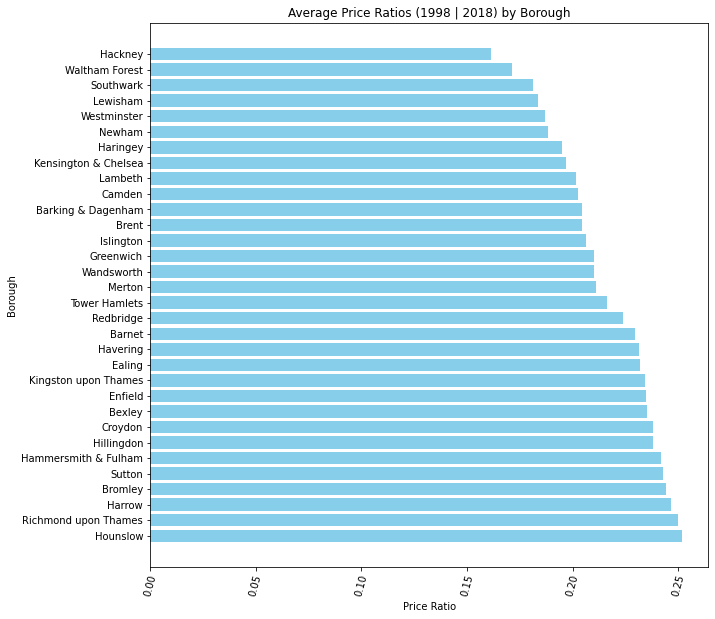

In [42]:
plt.figure(figsize=(10, 10))

# modify df to be sorted by ratio column
df_sorted = ratios_all_df.sort_values(by="ratio",ascending=False)

# horizontal bar plot
plt.barh(df_sorted['borough'],df_sorted['ratio'], color='skyblue')
plt.xlabel('Price Ratio')
plt.ylabel('Borough')
plt.title('Average Price Ratios (1998 | 2018) by Borough')
plt.xticks(rotation=75);

Let's determine the price increase of borough Hackney from 1998 to 2018.

In [43]:
# extracting Hackney ratio 1998 - 2018
mask = ratios_all_df['borough'] == 'Hackney'
hackney_ratio = ratios_all_df[mask]['ratio'][10]
hackney_ratio

0.16133493530705734

In [44]:
# percent increase of Hackney
percent_increase = ((1-hackney_ratio)/(hackney_ratio))*100
percent_increase

519.8285561008661

**The approx percent increase in average price from 1998 to 2018 for Hackney is 519.83%**

we can also determine the lowest average price increase of borough Hounslow.

In [45]:
# extracting Hunslow ratio 1998 - 2018
mask = ratios_all_df['borough'] == 'Hounslow'
hounslow_ratio = ratios_all_df[mask]['ratio'][16]
hounslow_ratio

0.25148317824115635

In [46]:
# percent increase of Hounslow
percent_increase = ((1-hounslow_ratio)/(hounslow_ratio))*100
percent_increase

297.6409106143329

### References

[1] specifying engine | read_excel(): https://stackoverflow.com/questions/67394705/open-excel-file-in-python-xlrderror-excel-xlsx-file-not-supported

[2] list of london boroughs: https://en.wikipedia.org/wiki/List_of_London_boroughs

[3] pd.melt(): https://pandas.pydata.org/docs/reference/api/pandas.melt.html

[4] pandas st.contains(): https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html 

[5] timeseries dt.month: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html